In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

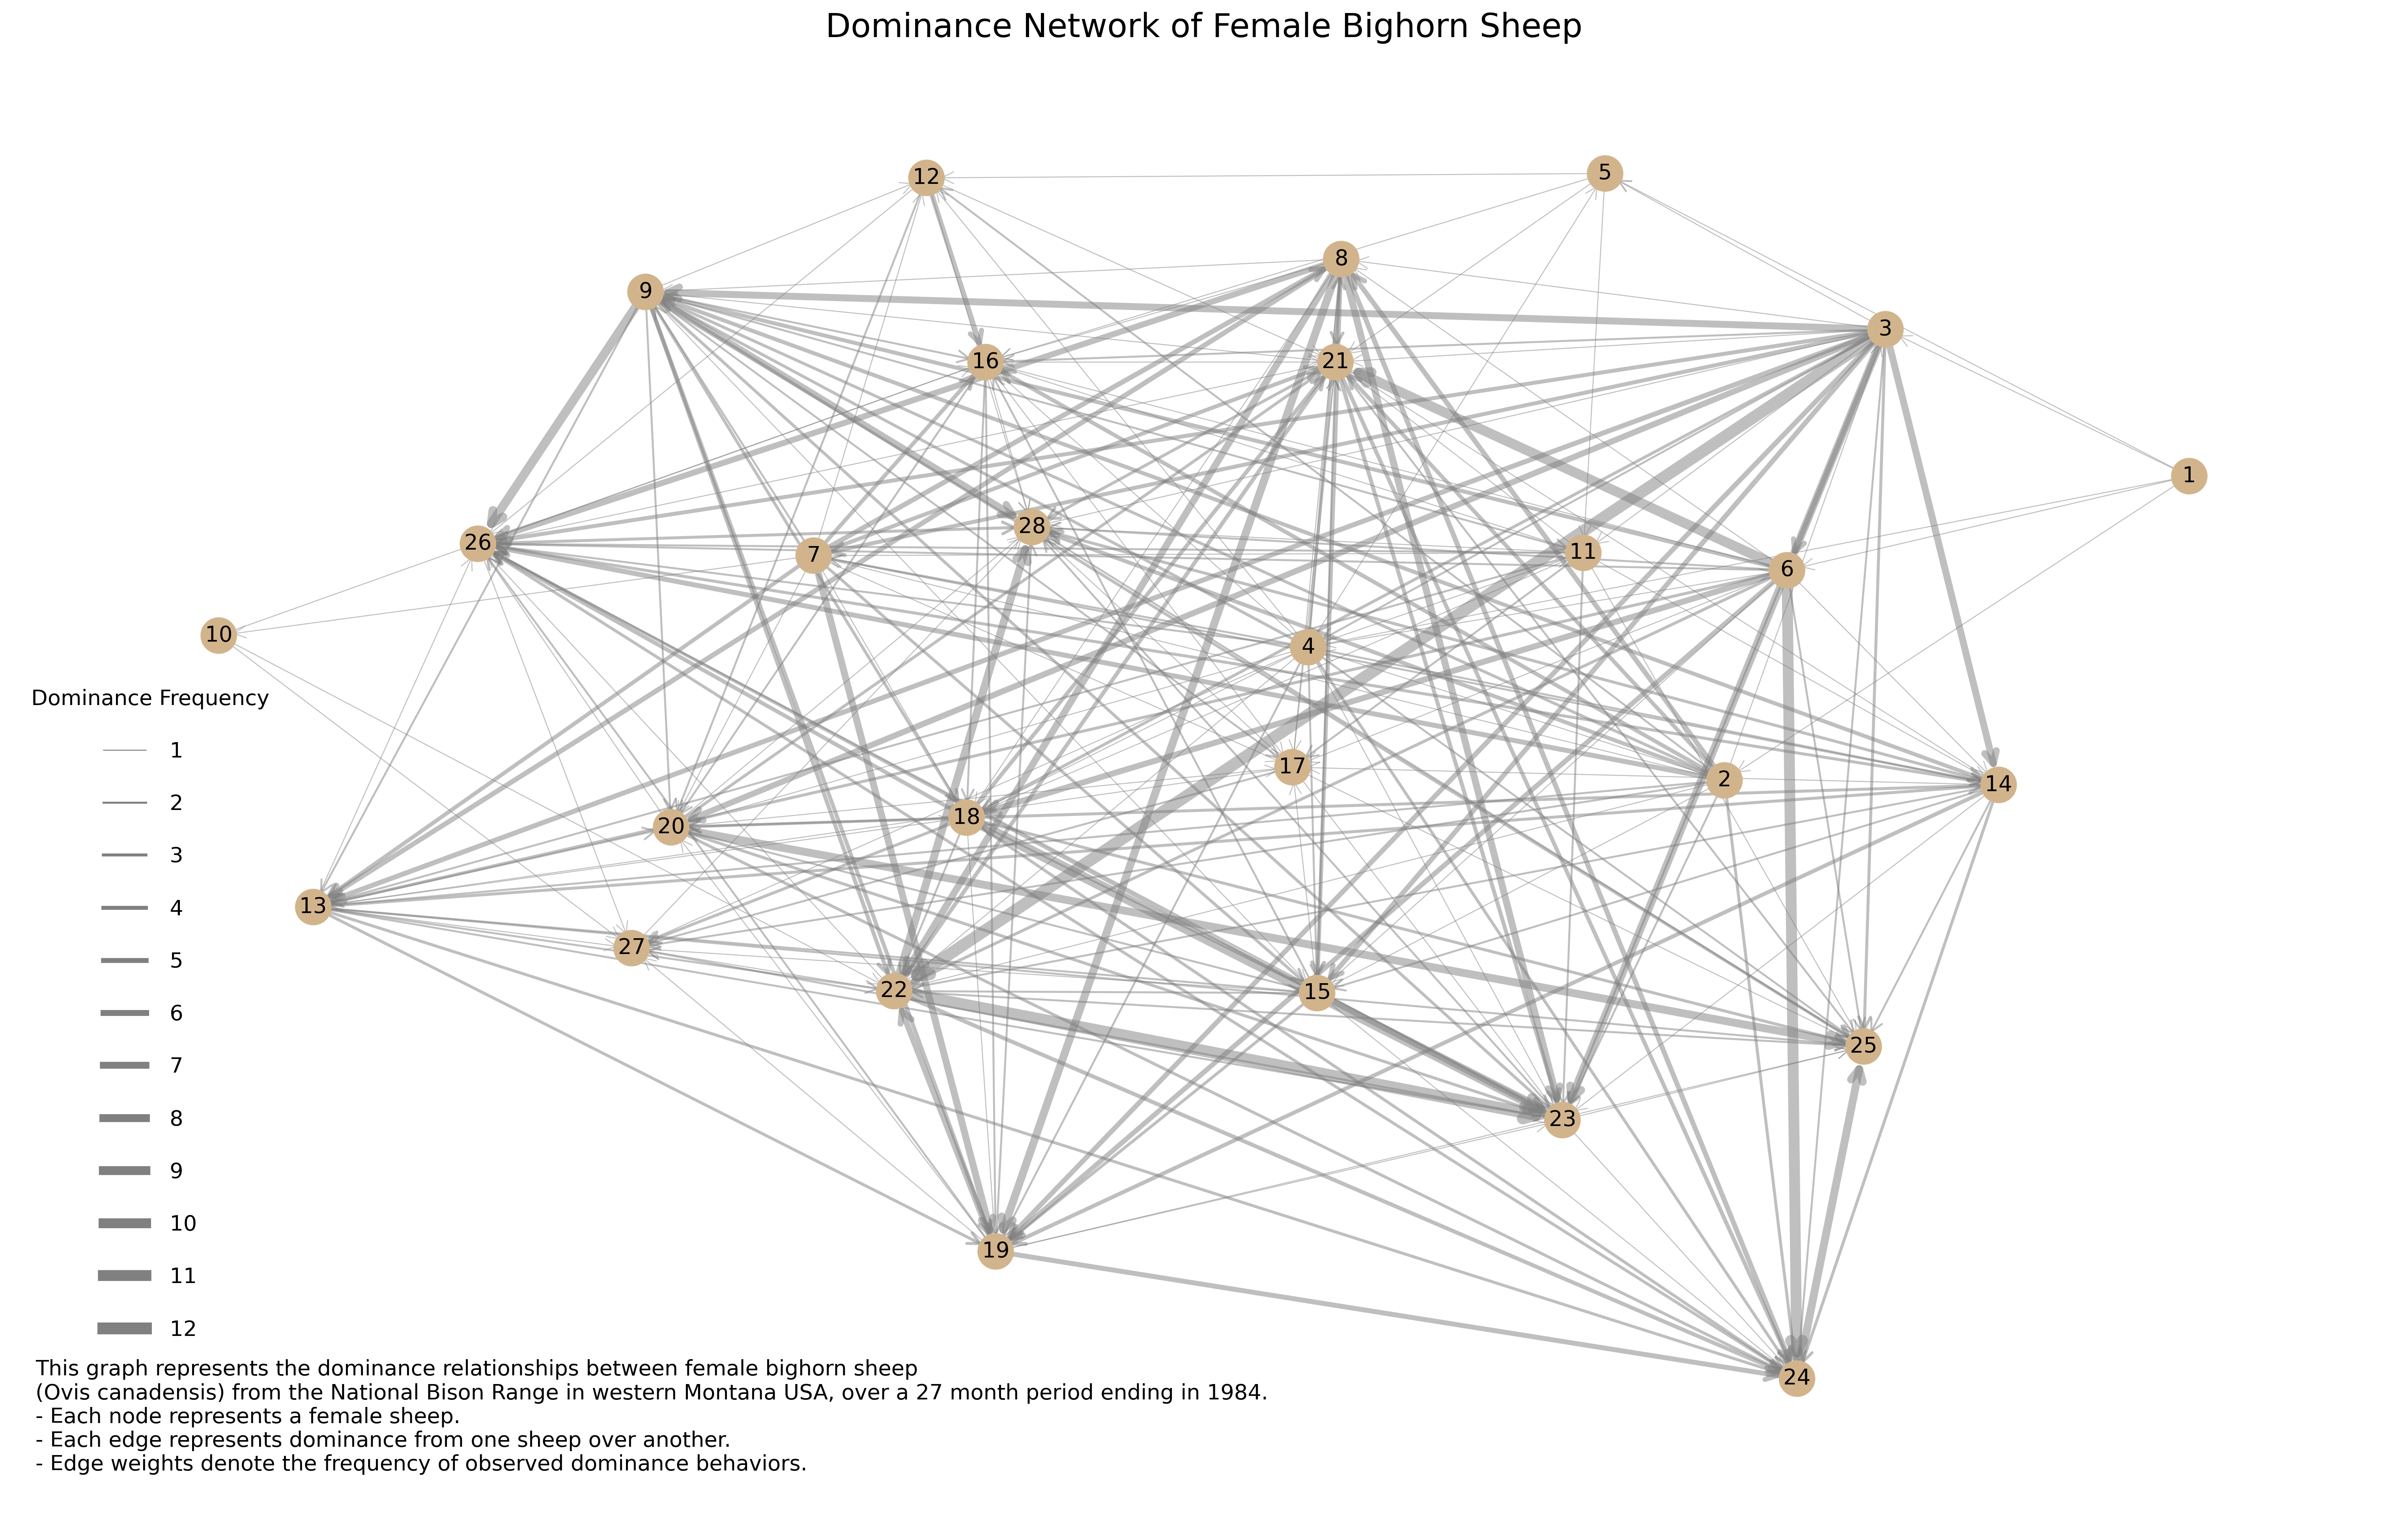

In [30]:
file_path = "out.moreno_sheep_sheep"
G = nx.Graph()
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('%') or not line.strip():
            continue
        node_from, node_to, weight = map(int, line.strip().split())
        G.add_edge(node_from, node_to, weight=weight)

weights = np.array([d['weight'] for _, _, d in G.edges(data=True)])

pos = nx.kamada_kawai_layout(G)

fig, ax = plt.subplots(1, 1, figsize=(26, 16), dpi=300)
ax.set_title("Dominance Network of Female Bighorn Sheep", fontsize=20)

node_colors = ["#D2B48C" for _ in G.nodes()]
nx.draw_networkx_nodes(
    G, 
    pos=pos, 
    node_color=node_colors, 
    node_size=450, 
    ax=ax
)

nx.draw_networkx_edges(
    G,
    pos=pos,
    width=[weight * 0.6 for weight in weights],
    edge_color="gray",
    alpha=0.5,  
    arrows=True, 
    arrowstyle='->',
    arrowsize=18,
    ax=ax,
)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, y, node, fontsize=7 + np.log(450 + 1), ha="center", va="center")

unique_weights = np.unique(weights)

edge_legend_handles = [
    mlines.Line2D([], [], color="gray", linewidth=w * 0.6, label=f" {w}") 
    for w in unique_weights
]

ax.legend(
    handles=edge_legend_handles,
    title="Dominance Frequency",
    frameon=False,
    bbox_to_anchor=(0, 0.1),
    loc="lower left",
    labelspacing=1.5,
    fontsize=13,
    title_fontsize=13
)

ax.text(
    0.01, 0.1,
    """This graph represents the dominance relationships between female bighorn sheep
(Ovis canadensis) from the National Bison Range in western Montana USA, over a 27 month period ending in 1984.
- Each node represents a female sheep.
- Each edge represents dominance from one sheep over another.
- Edge weights denote the frequency of observed dominance behaviors.""",
    fontsize=13,
    transform=ax.transAxes,
    verticalalignment="top"
)

plt.axis("off")

plt.savefig("sheep_dominance_network.png", format="PNG", dpi=300, bbox_inches="tight")

plt.show()